#Introduction à PyTorch :

Ce TP donne une initiation auframework de Machine/Deep Learning PyTorch en utilisant leserviceGoogle Colab. Ce TP a pour objectifs : 
- Comprendre la bibliothèque Tensor PyTorch et les réseaux de neurones.
- Construire et entrainer un réseaux de neurones pour la classification des images.

##PyTorch :

*PyTorch* est une bibliothèque de Machine/Deep Learning qui lie la ré-utilisabilité et la performance des outils de  Machine/Deep Learning :
- PyTorch fournit un style de programmation imp ́eratif et ”Pythonic” qui prend en charge lecode en tant que modèle. 
- PyTorch facilite le d ́ebogage et est compatible avec d’autres bibliothèques informatiques scientifiques populaire. 
- PyTorch prend en charge les accélérateurs matériels tels que comme GPU.  


Nous allons aborder quelques aspect lies aux Deep Learning en utilisant PyTorch.  
Nous finironspar un exemple d’utilisation de ces mod`eles pour la classification d’images sur plusieurs platformes matèriels.

##Google Colab :
Google Colaboratory plus communément appele  *Google  Colab* ou tout simplement *Colab* est un projet de recherche pour le prototypage de modèles de Machine Learning sur des plates-formes matérielles puissantes telles que les GPU et les TPU. *Google Colab* fournit un environnement de notebook *Jupyter* sur serveur pour le développement interactif. Google Colab est gratuit à utiliser comme les autres produits du *G Suite*.

##Préparation de l'environnement de développement :
**NOTE** : comme Google Colaboratory est un service cloud de Google, il faut s'assurer d'avoir uncompte Gmail afin de pouvoir l'utiliser.  

- **Première connexion** : en utilisant un navigateur web, connectez-vous https://colab.research.google.com/en utilisant votre  compte  Gmail. Vous allez être redirige vers une page introduisant Google  Colab. Commencez à prendre en main quelques concepts basiques du developpement sous Colab : exécuter les cellules codes existantes, en rajouter  d'autres, ajouter des cellules Markdown, etc.  
- **Création d'un Notebook** : cliquez sur ***Fichier→Nouveau notebook***. Changez le nom du notebook en double-cliquant sur **Untitled** en haut à gauche de la page en le remplaçant par un nom du format suivant : **TP\[formation\]\[matière\]\[NOM\]\[PRENOM\]**. Ce notebook vous suivra tout au long du TP. Le notebook devra être rendu à la fin des TP.  
- **Importation d'un Notebook** : cliquez sur ***Fichier→Ouvrir*** un notebook.  Localisez le notebook que vous trouverez avec l'ennoncé et faites ouvrir aprés l'avoir renommer suivant lacharte pr ́ec ́edente. C'est plus simple de travailler sur le carnet donné en TP que de le recréer à zero.  
- **Création et exécution des cellules** : il existe principalement deux types  de cellules :
1. `+ Code` pour code Python ou commande notebook/shell
2. `+ Texte` pour code Markdown ou HTML  
Pour exécuter une cellule, il faut cliquer sur le boutton 'Play' à gauche de la cellule, utliser le raccourci ***Shift+Entrée***, ou cluquer sur `Exécution` puis `Exécuter le code selectionné`.
- **Environnement d'exécution CPU/GPU/TPU** : google colab offre principalement trois plateformes d'exécution : 1) CPU (noté `None`), 2) GPU, et 3) TPU. 
Pour passer d'une platforme à une  autre, cliquez sur `Exécution`, `Modifier le type d'exécution`, le menu déroulant du `Accelerateur matériel` puis choisir la plateforme.

#Introduction au Deep Learning avec PyTorch
Cette introduction suppose la maitrise de la bibliothèque `numpy`.
##Installation PyTorch
Nous devrons d'abord installer la bibliothèque PyTorch. Vous pouvez le faire en utilisant la commande suivante :

In [1]:
!pip3 install torch torchvision

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f887980f0>: Failed to establish a new connection: [Errno -2] Name or service not known',)': /simple/torch/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f88798240>: Failed to establish a new connection: [Errno -2] Name or service not known',)': /simple/torch/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f887982e8>: Failed to establish a new connection: [Errno -2] Name or service not known',)': /simple/torch/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectio

###Tensors :
Un `Tensor` est une unité de stockage de données communément utilisée dans le domaine du Deep Learning. Comme `ndarray` dans `numpy`, un `Tensor` c'est généralement un tableau de `n` dimensions, adapté à une exécution sur GPU.  
Nous allons explorer quelques aspects sur les `Tensors`, en commençant par importer le package `torch` qui représente PyTorch.  

In [2]:
from __future__ import print_function
import torch

Nou pouvons d'abord déclarer une matrice sans initialisation de ses valeurs.  
Nous déclarons une matrice sur PyTorch comme suit :

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[-3.8029e+03,  1.6263e-40, -1.2961e-11],
        [-1.5212e+04,  1.6299e-40,  1.6751e-37],
        [-4.9745e-11,  1.6751e-37, -4.9745e-11],
        [ 1.6751e-37,  2.5574e-42,  0.0000e+00],
        [-8.2581e-28,  1.7796e-43,  8.0872e-24]])


Lorsqu'une matrice non initialisée est créée, les valeurs qui étaient dans la mémoire allouée à ce moment-là apparaîtront comme valeurs initiales. Nous pouvons déclarer une matrice, aléatoirement initialisée avec des valeurs réelles comprises entre 0 et 1 : 

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9588, 0.2898, 0.9681],
        [0.3765, 0.0578, 0.0514],
        [0.8732, 0.9861, 0.1290],
        [0.7963, 0.2265, 0.0955],
        [0.7436, 0.6616, 0.4469]])


Pour créer une matrice aléatoirement initialisée avec des entiers générer entre 1 et 10 : 

In [5]:
x =  torch.randint(1, 10, (5, 3))
print(x)

tensor([[2, 4, 6],
        [6, 5, 8],
        [6, 6, 3],
        [9, 1, 3],
        [4, 9, 8]])


Déclarer une matrice remplie de zéros et de `dtype` (i.e. data type) long qui est un entier sur 64 bits :

In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Nou pouvons s'assurer du type de la variable `x` en utilisant la fonction `type()` :

In [7]:
type(x)

torch.Tensor

Nous pouvons créer un `Tensor` directement à partir des valeurs prédéfinies :

In [8]:
x = torch.tensor([[0,1,2], [3,4,5], [6,7,8], [-6,-7,-8], [-3,-4,-5]])
print(x)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [-6, -7, -8],
        [-3, -4, -5]])


On peut créer un `tensor` basé sur un autre `tensor` existant. Ces méthodes réutilisent les propriétés du `tensor` d'entrée :

In [9]:
x = x.new_zeros(5,3, dtype=torch.double)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


Voir https://pytorch.org/docs/stable/torch.html#torch.randint_like pour regénerer un `tensor` initialisé avec des valeurs aléatoires en se basant sur un `tensor` existant :

In [10]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

tensor([[-0.2231, -1.0972, -0.8638],
        [-0.4197, -0.3429, -0.1550],
        [-1.8806,  0.1434, -0.2879],
        [-0.2857,  0.8276,  0.5593],
        [ 0.1287,  0.2027,  0.5738]])


### Opérations sur les `Tensor`
Les opérations sur les `tensor` peuvent être directement appliquée sur ces dérniers comme suit : 

In [11]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.3125, -0.7367, -0.6143],
        [ 0.1928,  0.2158,  0.7188],
        [-1.6616,  0.9875,  0.0833],
        [ 0.3016,  1.2232,  0.8364],
        [ 0.8408,  0.4710,  1.1492]])


Ou bien utiliser des fonctions prédéfinies de PyTorch :

In [12]:
print(torch.add(x,y))

tensor([[ 0.3125, -0.7367, -0.6143],
        [ 0.1928,  0.2158,  0.7188],
        [-1.6616,  0.9875,  0.0833],
        [ 0.3016,  1.2232,  0.8364],
        [ 0.8408,  0.4710,  1.1492]])


Le résultat pourrait être récupéré en passant un `tensor` (noté `z`) comme argument :

In [13]:
z = torch.empty(5,3)
torch.add(x,y,out=z)
print(z)

tensor([[ 0.3125, -0.7367, -0.6143],
        [ 0.1928,  0.2158,  0.7188],
        [-1.6616,  0.9875,  0.0833],
        [ 0.3016,  1.2232,  0.8364],
        [ 0.8408,  0.4710,  1.1492]])


Un opération sur un `tensor` pourrait être faite `in-place` (généralement suivi par `_`), c'est à dire que le résultat est stocké dans le `tensor` appelant de la fonction et repmlacera donc l'anciène valeur : 

In [14]:
y.add_(x)
print(y)

tensor([[ 0.3125, -0.7367, -0.6143],
        [ 0.1928,  0.2158,  0.7188],
        [-1.6616,  0.9875,  0.0833],
        [ 0.3016,  1.2232,  0.8364],
        [ 0.8408,  0.4710,  1.1492]])


Nous pouvons utiliser la notation de `numpy` pour manipuler les `tensor` sur PyTorch. Afficher la première colonne comme suit : 

In [15]:
print(y[:, 0])

tensor([ 0.3125,  0.1928, -1.6616,  0.3016,  0.8408])


Il y a donc un lien entre les `tensor` PyTorch et les `NumPy Array`.  
Les modules `Torch Tensor` et `NumPy` partageront le même éspace mémoire (si le Torch Tensor est sur CPU), et changer l'un changera l'autre.  
On peut convertir un `tensor` PyTorch en un `array` Numpy commme suit :

In [16]:
a = torch.rand(5)
print("a : ", a)
b = a.numpy()
print("b : ", b)

a :  tensor([0.2526, 0.9980, 0.6574, 0.2009, 0.4081])
b :  [0.2525999  0.99802136 0.65737057 0.20094615 0.40814155]


Si l'on change la valeur du `tensor` PyTorch, la valeur du `array` Numpy change également:

In [17]:
a.add_(1)
print("a : ", a)
print("b : ", b)

a :  tensor([1.2526, 1.9980, 1.6574, 1.2009, 1.4081])
b :  [1.2526    1.9980214 1.6573706 1.2009461 1.4081416]


On peut faire la conversion dans le sens inverse :

In [18]:
import numpy as np
# Générer un tableau aléatoirement initilisé
a = np.random.rand(5)
# Convertir le tableau en un tensor PyTorch
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print("a : ", a)
print("b : ", b)

a :  [1.11674193 1.06819685 1.76770276 1.11520086 1.84828823]
b :  tensor([1.1167, 1.0682, 1.7677, 1.1152, 1.8483], dtype=torch.float64)


Jusqu'à présent, tous les `tensor` créés sont traité sur CPU.  
`PyTorch` offre la possibilité de transférer les `tensor` sur GPU (c'est d'ailleurs la différence entre `Numpy` et `PyTorch`).  
Les `tensor` peuvent donc être transférés entre CPU <-> GPU en utilisant la méthode `.to()`. 

###Les Tensors CUDA 
Il faut d'abord changer le type de l'accélérateur matériel en GPU afin de pour utiliser les `CUDA tensor`.

In [19]:
device = "cpu"
if torch.cuda.is_available():
  device = torch.device("cuda")
print(device)

cuda


On peut créer le `tensor` directement sur GPU en le passant en paramètre :

In [20]:
%%time
x = torch.rand(5, device=device)
y = torch.ones(5, device=device)
x.add_(y)
print(x)

tensor([1.1515, 1.6849, 1.3072, 1.9045, 1.9542], device='cuda:0')
CPU times: user 4.69 s, sys: 3.33 s, total: 8.02 s
Wall time: 12 s


On peut créer le `tensor` sur CPU puis le transférer sur GPU :

***Excercise*** : 
- Coder des functions de calcul des opérations élémentaires sur des matrices sur CPU et sur GPU en utilisant `torch` (e.g. `matrix_add_CPU(a, b), matrix_add_GPU(a,b)`. 
- Mesurer les temps d'exécutions des fonctions codées puis comparer les en utilisant un histogramme `pyplot`.
- Que remarquiez-vous?

In [21]:
"""
%%time
a = torch.rand(5, device="cpu")
b = torch.ones(5, device="cpu")
c = torch.empty(5, device="cpu")
c = torch.add(a,b)
print("Sur CPU : ",c)
a = a.to(device)
b = b.to(device)
c = torch.add(a,b).to(device)
print("Sur GPU : ", c)
"""

Sur CPU :  tensor([1.2385, 1.0168, 1.6355, 1.2552, 1.6886])
Sur GPU :  tensor([1.2385, 1.0168, 1.6355, 1.2552, 1.6886], device='cuda:0')
CPU times: user 4 ms, sys: 20 ms, total: 24 ms
Wall time: 102 ms


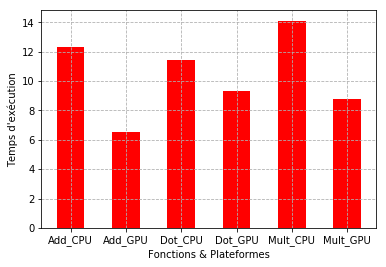

In [22]:
"""
%matplotlib inline
import matplotlib.pyplot as plt
width = 0.5
mesures = {"Add_CPU":12.3, "Add_GPU": 6.5, "Mult_CPU": 14.1, "Mult_GPU": 8.8, "Dot_CPU": 11.4, "Dot_GPU": 9.3}
plt.bar(mesures.keys(), mesures.values(), width, color='r')
plt.xlabel("Fonctions & Plateformes")
plt.ylabel("Temps d'exécution")
plt.grid(b=True, which='major', axis='both', linestyle='--')
plt.show()
"""

In [24]:
def matrix_add_CPU(a, b):
    return torch.add(a, b)

def matrix_add_GPU(a, b):
    a = a.to(device="cuda")
    b = b.to(device="cuda")
    return torch.add(a, b)

# Exemple d'utilisation
a = torch.rand(5, device="cpu")
print("a:", a)
b = torch.ones(5, device="cpu")
print("b:", b)

# Sur CPU
result_cpu = matrix_add_CPU(a, b)
print("Sur CPU:", result_cpu)

# Sur GPU
result_gpu = matrix_add_GPU(a, b)
print("Sur GPU:", result_gpu)

a: tensor([0.9033, 0.1633, 0.7436, 0.1411, 0.5171])
b: tensor([1., 1., 1., 1., 1.])
Sur CPU: tensor([1.9033, 1.1633, 1.7436, 1.1411, 1.5171])
Sur GPU: tensor([1.9033, 1.1633, 1.7436, 1.1411, 1.5171], device='cuda:0')


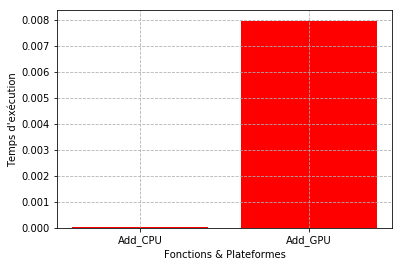

In [25]:
import time
import matplotlib.pyplot as plt

def measure_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time, result

# Exemple d'utilisation
a = torch.rand(5, device="cpu")
b = torch.ones(5, device="cpu")

# Mesure du temps d'exécution sur CPU
cpu_time, _ = measure_time(matrix_add_CPU, a, b)

# Mesure du temps d'exécution sur GPU
gpu_time, _ = measure_time(matrix_add_GPU, a, b)

# Création de l'histogramme
plt.bar(['Add_CPU', 'Add_GPU'], [cpu_time, gpu_time], color='r')
plt.xlabel("Fonctions & Plateformes")
plt.ylabel("Temps d'exécution")
plt.grid(b=True, which='major', axis='both', linestyle='--')
plt.show()

###La convolution :
La cnvolution est la base des réseau neuronal convolutif. 
Comme le montre la figure ci-dessous, la convolution (à deux dimensions dans nôtre cas) consiste à appliquer un filtre 2D (également appelé noyau) sur une matrice d'une taille plus grande, en appliquant une multiplication élément à élément, suivie d'une somme des résultats de multiplication. 
En plus de la matrice en entrée et du filtre, la convolution prend également un pas (*stride* en anglais) et une marge (*padding* en anglais). Le pas contrôle le mouvement du filtre sur la matrice en entrée tandis que la marge spécifie le nombre de lignes/colonnes contenant des zéros à ajouter à la frontière de la matrice en entrée. Dans l'exemple ci-dessous, le pas et la marge sont fixés à 1.
![](https://i.stack.imgur.com/9OZKF.gif)

***Exercice*** : 
1. Proposez deux implémentations d'une convolution 2D tel que:
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur CPU
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur GPU
avec `matrix` la matrice en entrée, `kernel` qui est le filtre, le pas `stride`, et la marge `padding`.  
Afin de tester votre implémentation, ajuster les valeurs du `stride` et du `padding` afin de garder les mêmes dimensions de la matrice en entrée après l'application de la convolution.
2. Proposez une implémentation d'une fonction de visualisation d'une matrice sous forme d'image. Pour ceci, vous pouvez utiliser la fonction `imshow()` de `pyplot`.
3. Toujours en s'assurant que les dimensions de l'image en sortie restent les mêmes après la convolution, suivez l'exemple ci-dessous en testant votre implémentation sur l'image donnée dans l'exemple avec les filtres suivants :  
$$a = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}$$  
$$b = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$  
$$c = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}$$
4. Affichez les images avant et aprés la comnvolution. Que remarquiez-vous?
5. Refaites le même traitement avec les fltres $a$, $b$, et $c$ en changeant leur taille comme suit : 5x5, 7x7, et en ajustant les veleurs du `du stride` et du `padding`.
6. Comparez les temps d'exécution des deux implémentations de la convolution, CPU vs GPU sous forme d'histogramme. 


In [33]:
"""
%matplotlib inline

import matplotlib.pyplot as plt 
from PIL import Image
import urllib.request
from torchvision import transforms
import numpy as np
 
img = Image.open(urllib.request.urlopen("http://decsai.ugr.es/cvg/CG/images/base/1.gif")) 
x = np.array(img.getdata(), np.uint8).reshape(img.size[1], img.size[0])
plt.imshow(x)
"""

'\n%matplotlib inline\n\nimport matplotlib.pyplot as plt \nfrom PIL import Image\nimport urllib.request\nfrom torchvision import transforms\nimport numpy as np\n \nimg = Image.open(urllib.request.urlopen("http://decsai.ugr.es/cvg/CG/images/base/1.gif")) \nx = np.array(img.getdata(), np.uint8).reshape(img.size[1], img.size[0])\nplt.imshow(x)\n'

In [32]:
"""
Pour commencer, voici deux implémentations de convolution 2D, une pour CPU et une pour GPU, utilisant PyTorch
"""

import torch.nn.functional as F

def my_2D_Conv_CPU(matrix, kernel, stride, padding):
    matrix = torch.tensor(matrix, dtype=torch.float32)
    kernel = torch.tensor(kernel, dtype=torch.float32)
    result = F.conv2d(matrix.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=stride, padding=padding)
    return result.squeeze().numpy()

def my_2D_Conv_GPU(matrix, kernel, stride, padding):
    matrix = torch.tensor(matrix, dtype=torch.float32, device="cuda")
    kernel = torch.tensor(kernel, dtype=torch.float32, device="cuda")
    result = F.conv2d(matrix.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=stride, padding=padding)
    return result.squeeze().cpu().numpy()

"""
voici une fonction de visualisation d'une matrice sous forme d'image :
"""
def visualize_matrix_as_image(matrix, title="Image"):
    plt.imshow(matrix, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

"""
pour effectuer des convolutions et visualiser les résultats 
"""
# Exemple avec les filtres a, b, c de taille 3x3
a = torch.tensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
b = torch.tensor([[1, 0, 1], [1, 0, 1], [1, 0, 1]])
c = torch.tensor([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Charger l'image
#img = Image.open(urllib.request.urlopen("http://decsai.ugr.es/cvg/CG/images/base/1.gif"))
img = Image.open("/home/jetson/multicore/téléchargement.png")
#image telecharger sur googlecolab puis trsferer sur la carte 
x = np.array(img.getdata(), np.uint8).reshape(img.size[1], img.size[0])


# Appliquer la convolution avec les filtres de taille 3x3
result_a_cpu = my_2D_Conv_CPU(x, a, stride=1, padding=1)
result_b_cpu = my_2D_Conv_CPU(x, b, stride=1, padding=1)
result_c_cpu = my_2D_Conv_CPU(x, c, stride=1, padding=1)

# Visualiser les résultats avant et après la convolution
visualize_matrix_as_image(x, title="Image originale")
visualize_matrix_as_image(result_a_cpu, title="Convolution avec filtre a (CPU)")
visualize_matrix_as_image(result_b_cpu, title="Convolution avec filtre b (CPU)")
visualize_matrix_as_image(result_c_cpu, title="Convolution avec filtre c (CPU)")

"""
répéter le processus en ajustant la taille des filtres, le stride et le padding
"""
# Mesurer le temps d'exécution pour la convolution CPU
start_time_cpu = time.time()
result_cpu = my_2D_Conv_CPU(x, a, stride=1, padding=1)
end_time_cpu = time.time()
execution_time_cpu = end_time_cpu - start_time_cpu

# Mesurer le temps d'exécution pour la convolution GPU
start_time_gpu = time.time()
result_gpu = my_2D_Conv_GPU(x, a, stride=1, padding=1)
end_time_gpu = time.time()
execution_time_gpu = end_time_gpu - start_time_gpu

# Créer un histogramme pour comparer les temps d'exécution
plt.bar(['Conv_CPU', 'Conv_GPU'], [execution_time_cpu, execution_time_gpu], color='b')
plt.xlabel("Plateformes")
plt.ylabel("Temps d'exécution (s)")
plt.grid(b=True, which='major', axis='both', linestyle='--')
plt.show()

ValueError: cannot reshape array of size 718960 into shape (430,418)